## 시계열(TimeSeries) 분석

 * 1. (TimeSeries) 시계열 자료
    * 연도별, 계절별, 월별, 일,시, 분, 초별로 시간의 흐음에 따라 관측된 자료
     
 * 시계열자료의 분석 목적:
    * 1) (forecast) 미래에 대한 예측
    * 2) 시스템 또는 확률 과정의 이해와 제어(control)

## datetime 오브젝트
* 날짜와 시간을 처리하는 등의 가양한 기능을 제공하는 파이썬 라이브러리
* 날짜를 처리하는 date 오브젝트
* 시간을 처리하는 time 오브젝트
* 날짜와 시간을 처리하는 datetime 오브젝트가 포함되어있다.

In [1]:
# datetime 라는 모듈(from) 에서 datetime 이라는 함수(import) 을 가져온다
from datetime import datetime 

In [16]:
now1 = datetime.now() # 현재시간 가져와서 now1에 넣어라(KST)
print(now1)

2021-05-14 09:56:13.318310


In [17]:
# UTC(협정 세계시)
now2 = datetime.today()
print(now2) 

2021-05-14 09:56:14.313539


In [19]:
# 시간을 직접 입력 인자로 전달
t1 = datetime.now() #현재 시간 
t2 = datetime(1970, 1, 1) # 년,월,일<- 인자로 전달 
t3 = datetime(1970, 12, 12, 13, 24, 34) # 년,월,일,시,분,초 <- 인자로 전달 

print(t1)
print(t2)
print(t3)

2021-05-14 09:58:01.304825
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# datetime 객체에서 datetime 객체를 빼면 시간이 나온다
# datetime 오브젝트를 사용하는 이유 중 하나는 시간계산을 할 수 있다

diff1 = t1 - t2

print(diff1)
print(type(diff1))

18761 days, 9:36:41.125093
<class 'datetime.timedelta'>


In [6]:
diff2 = t2 - t1

print(diff2)
print(type(diff2))

-18762 days, 14:23:18.874907
<class 'datetime.timedelta'>


## 문자열을 datetime 오브젝트로 변환하기
* 시계열 데이터를 문자열로 저장 --> 시간 계산을 할 수 없기 때문에 datetime 오브젝트로 변환해야함
* to_datetime 메서드를 사용하여 문자열을 datetime 오브젝트로 변환

In [20]:
import pandas as pd 
import os
ebola = pd.read_csv('../data/country_timeseries.csv')

In [21]:
print(ebola.info())
# date 가 object 타입으로 지정되어 있는 상태_계산 안됨 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.3+ KB
None


In [22]:
# to_datetime = object로 되어있는 Date(칼럼)를 datetime64(date_dt <- 여기에) 타입으로 바꿈

ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

In [25]:
# test_df1에 DataFrame화 해서 행에는 order_day 넣고 열에는 01/01/15', '02/01/15', '03/01/15 를 넣는다.
# test_df1에 date_dt1 칼럼을 생성하고 거기에 to_datetime화 한 order_day를 넣고 format='%d/%m/%y' 을 지정한다.

test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})

test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y') # 배치는 항상 년,월,일
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')

print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [26]:
#위에꺼랑 동일 

test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']})
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y') # 위에서에서 '-' <- 얘 추가 

print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


## 시계열 데이터를 구분해서 추출

In [27]:
now = datetime.now() # 현재 시,분,초
print(now)

2021-05-14 10:48:34.812867


In [35]:
# strftime 메서드와 시간 형식 지정자을 이용하여 시계열 데이터를 잘라냄

nowDate = now.strftime('%Y-%m-%d') # 현재 시간에서 %Y-%m-%d 이것만 잘라(추출)가지고 오겠다.
nowDate2 = now.strftime('%H:--%M:--%S') #, 시:--분:--초
nowDate3 = now.strftime('%Y-%m-%d <> %H:--%M:--%S') # 연-월-일 <>시:--분:--초
print(nowDate)
print(nowDate2)
print(nowDate3)

2021-05-14
10:--48:--34
2021-05-14 <> 10:--48:--34


In [30]:
nowTime = now.strftime('%H:%M:%S') # 현재 시간에서 '%H:%M:%S' 이것만 잘라(추출) 가지고 오겠다.
print(nowTime) 

10:48:34


In [15]:
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime) 

2021-05-14 08:41:47


## datetime 오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기
* 위에서는 to_datetime 메서드를 사용하여 문자열로 저장된 Date열을 datetime 오브젝트로 변환
* pars_dates 옵셕을 부여하여 문자열을 datetime으로 불러올 수 있다

In [36]:
ebola1 = pd.read_csv('../data/country_timeseries.csv', parse_dates=['Date']) #데이터를 불러오면서 parse_dates=['Date'] 으로 타입 변경
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.3 KB
None


## datetime 오브젝트에서 날짜 정보 추출하기
* datetime 오브젝트에는 년,월,일과 같은 날짜 정보가 따로 저장되어 있다.(속성 존재)
* datetime 오브젝트에서 날짜 정보 추출

In [37]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18']) #칼럼 생성 후 데이터('2018-05-16', '2018-05-17', '2018-05-18') 넣음 
d1 = pd.to_datetime(date_series) # 타입 변경
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [42]:
print(d1[0].year) # 년만 가져와

2018


In [19]:
print(d1[0].month)# 월만 가져와

5


In [47]:
print(d1[0].day)# 날만 가져와 * [0] = 열의 순서. 저기에는 지금 0~2까지 순서대로 있음 

16


## dt 접근자로 시계열 데이터 정리하기

In [21]:
ebola = pd.read_csv('../data/country_timeseries.csv') # 데이터 불러오기
ebola['date_dt'] = pd.to_datetime(ebola['Date']) # date 타입으로 변경하고 ebola에 ['date_dt'] 칼럼 생성 

In [49]:
print(ebola[['Date', 'date_dt']].head())

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31


In [48]:
print(ebola['date_dt'][3].year) # 3번째 줄에 있는 연도를 가져와 (인덱스 사용)

2015


In [24]:
print(ebola['date_dt'][3].month) # 3번째 줄에 있는 월을 가져와 (인덱스 사용)

1


In [25]:
print(ebola['date_dt'][3].day) # 3번째 줄에 있는 날을 가져와 (인덱스 사용)

2


In [26]:
# dt 접근자로 date_dt열에 한번에 접근해서 year 속성을 이용하여 년도값 추출
# 추출한 year 를 ebola df의 새로운 열['year'] 추가

ebola['year'] = ebola['date_dt'].dt.year 
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [27]:
# month, day 칼럼을 생성하고 여기에 date_dt의 month,day 만 잘라서 넣어라
# 그리고 칼럼 'Date', 'date_dt', 'year', 'month', 'day' 를 출력해라

ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [28]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 에볼라 최초 발병일 계산하기

In [29]:
# 끝에서 5개 가지고오고 칼럼도 5개만 가져와 (행:열)
# 데이터가 시간 역순으로 정렬되어 있다.

print(ebola.iloc[-5:, :5]) 

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [50]:
# 에볼라 최초 발병일 2014-03-22_ min 메ㅐ서드를 사용하여 확인

print(ebola['date_dt'].min()) # 최초 발생 (최소값)
print(ebola['date_dt'].max()) # 최근 발생 (최대값)
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
2015-01-05 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [31]:
# Date 열에서 에볼라 최초 발병일을 빼면 에볼라 진행(기간) 정도를 알 수 있다.

ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


## 파산한 은행의 개수 계산하기

In [51]:
banks = pd.read_csv('../data/banklist.csv') 
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [33]:
# Closing Date, Updated Date 가 현재 object(문자열)로 들어가 있음.

banks_no_dates = pd.read_csv('../data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [55]:
banks = pd.read_csv('../data/banklist.csv', parse_dates=[5, 6]) # 5,6(인덱스) 열만 Date 타입으로 변환해서 가져와
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


In [35]:
# dt 접근자와 year, quarter 속성을 이용하여 은행이 파산한 연도, 분기를 새호운 열로 추가

banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)

print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [36]:
# groupby 갈기면 연도별로 파산한 은행의 개수 구함

closing_year = banks.groupby(['closing_year']).size()

print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [37]:
#연도별로 그룹화 한 다음 다시 분기별로 그룹화 하여 출력 

closing_year_q = banks.groupby(['closing_year', 'closing_quarter']).size()

print(closing_year_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

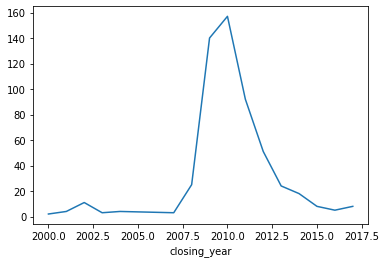

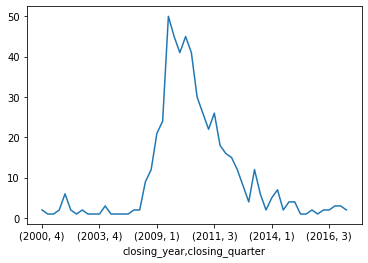

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closing_year.plot() 
plt.show()

fig, ax = plt.subplots() 
ax = closing_year_q.plot() 
plt.show()

## 테슬라 주식 데이터로 시간 계산하기

In [85]:
# Date 열을 parse_dates인자에 전달하여  Datetime 타입으로 변경 
tesla = pd.read_csv('../data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
Date          1949 non-null datetime64[ns]
Open          1949 non-null float64
High          1949 non-null float64
Low           1949 non-null float64
Close         1949 non-null float64
Volume        1949 non-null float64
ExDividend    1949 non-null float64
SplitRatio    1949 non-null float64
AdjOpen       1949 non-null float64
AdjHigh       1949 non-null float64
AdjLow        1949 non-null float64
AdjClose      1949 non-null float64
AdjVolume     1949 non-null float64
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [86]:
# dt접근자를 이용하여 2010년 6월 데이터 추출 

print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

           Date   Open     High    Low  Close      Volume  ExDividend  \
1947 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0         0.0   
1948 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0         0.0   

      SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  
1947         1.0    25.79  30.4192   23.30     23.83  17187100.0  
1948         1.0    19.00  25.0000   17.54     23.89  18766300.0  


## datetime 오브젝트를 인덱스로 설정하여 데이터 추출하기

In [87]:
tesla.index = tesla['Date'] # tesla['Date'] 를 인덱스로 사용하겠다.
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [88]:
print(tesla['2015'].iloc[:5, :5]) # '2015'거 중에서 행,열 5개씩 가져와 

                 Date    Open     High       Low   Close
Date                                                    
2015-12-31 2015-12-31  238.51  243.450  238.3700  240.01
2015-12-30 2015-12-30  236.60  243.634  235.6707  238.09
2015-12-29 2015-12-29  230.06  237.720  229.5470  237.19
2015-12-28 2015-12-28  231.49  231.980  225.5400  228.95
2015-12-24 2015-12-24  230.56  231.880  228.2800  230.57


In [89]:
print(tesla['2010-06'].iloc[:, :5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


## 시간 간격을 인덱스로 설정하여 데이터 추출하기

In [90]:
# Date열에서 Date의 최소값을 빼면 데이터를 수집한 이후에 얼마나 시간이 흘렀는지 알 수 있다

tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()

print(tesla.head())

                 Date    Open    High     Low   Close      Volume  ExDividend  \
Date                                                                            
2018-03-27 2018-03-27  304.00  304.27  277.18  279.18  13696168.0         0.0   
2018-03-26 2018-03-26  307.34  307.59  291.36  304.18   8324639.0         0.0   
2018-03-23 2018-03-23  311.25  311.61  300.45  301.54   6600538.0         0.0   
2018-03-22 2018-03-22  313.89  318.82  308.18  309.10   4914307.0         0.0   
2018-03-21 2018-03-21  310.25  322.44  310.19  316.53   5927881.0         0.0   

            SplitRatio  AdjOpen  AdjHigh  AdjLow  AdjClose   AdjVolume  \
Date                                                                     
2018-03-27         1.0   304.00   304.27  277.18    279.18  13696168.0   
2018-03-26         1.0   307.34   307.59  291.36    304.18   8324639.0   
2018-03-23         1.0   311.25   311.61  300.45    301.54   6600538.0   
2018-03-22         1.0   313.89   318.82  308.18    309.10   4

In [91]:
# ref_date 열을 인덱스로 지정, 시간 간격(ref_date)을 이용하여 데이터 추출 

tesla.index = tesla['ref_date']

print(tesla.iloc[:5, :5])

                Date    Open    High     Low   Close
ref_date                                            
2828 days 2018-03-27  304.00  304.27  277.18  279.18
2827 days 2018-03-26  307.34  307.59  291.36  304.18
2824 days 2018-03-23  311.25  311.61  300.45  301.54
2823 days 2018-03-22  313.89  318.82  308.18  309.10
2822 days 2018-03-21  310.25  322.44  310.19  316.53


In [92]:
# 데이터를 수집한 이후 최초 5일의 데이터 추출
# 4 days는 데이터가 없어서 출력이 안됨 

print(tesla['5 days':].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
3 days   2010-07-02  23.00  23.1000  18.71  19.20
2 days   2010-07-01  25.00  25.9200  20.27  21.96
1 days   2010-06-30  25.79  30.4192  23.30  23.83
0 days   2010-06-29  19.00  25.0000  17.54  23.89


## 시간 범위 생성하여 인덱스로 지정하기

In [93]:
ebola = pd.read_csv('../data/country_timeseries.csv', parse_dates=[0]) 
print(ebola.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [94]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [95]:
#date_range 메서드를 이용하여 '2014-12-31'~'2015-01-05' 인덱스 생성

head_range = pd.date_range(start='2014-12-31', end='2015-01-05') 
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [96]:
# 원본데이터 손상을 방지하기 위해 df의 앞 5개 데이터만 추출 새로운 df 생성 
ebola_5 = ebola.head()

# Date열을 인덱스로 지정 
ebola_5.index = ebola_5['Date']

# 생성한 시간 범위(head_range를 인덱스로 지정 
ebola_5.reindex(head_range)

print(ebola_5.iloc[:5, :5])

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0


## 시간 범위의 주기 설정하기

In [97]:
print(pd.date_range('2017-01-01', '2017-01-07', freq='B'))

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')


## 에볼라의 확산 속도 비교하기

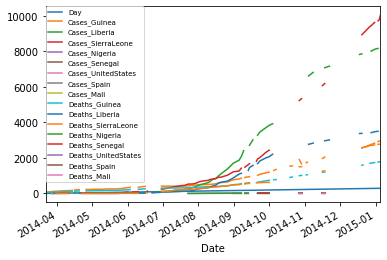

In [98]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots() 
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.) 
plt.show()